In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = r"C:\Users\Admin\Desktop\DA.BA\Cross_Selling_Project Naresh IT\cleaned_Insurance_data_50k.csv"
df = pd.read_csv(file_path)

In [3]:
# let check the data
df.head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,target
0,30.0,F,Divorced,2.0,LHS,SPT,PG,1.948181,No,NO,-20709.0,INV,2155940.0,Cold,1
1,48.0,M,Divorced,3.0,LHS,SFT,OC,6.372918,No,NO,-52383.0,TLE,991685.0,Warm,1
2,53.0,M,Married,4.0,NE,SPT,PG,5.820387,Yes,NO,4018892.0,ANS,1972325.0,Cold,0
3,45.0,M,Married,2.0,PD,SFT,RR,1.230810,No,ANS,34644.0,ANS,3932434.0,Warm,0
4,37.0,M,Married,3.0,BD,SPT,BA,1.165025,No,NO,27473.0,TLE,1984786.0,Hot,0


In [4]:
df.shape

(49976, 15)

In [5]:
df.isnull().sum()

Age                     0
Gender                  0
Marital_Status          0
Family_Members          0
Education               0
Occupation              0
Job_Title               0
Income                  0
Current_Product         0
Current_Product_Type    0
Current_Coverage        0
New_Product_Type        0
New_Coverage            0
Rating                  0
target                  0
dtype: int64

In [6]:
# renaming the 'target' column back to 'converted
df.rename(columns = {'target':'Converted'}, inplace =  True)

In [7]:
# Cors check 
df.columns

Index(['Age', 'Gender', 'Marital_Status', 'Family_Members', 'Education',
       'Occupation', 'Job_Title', 'Income', 'Current_Product',
       'Current_Product_Type', 'Current_Coverage', 'New_Product_Type',
       'New_Coverage', 'Rating', 'Converted'],
      dtype='object')

In [8]:
# --- A. Target Variable: Converted ---
print("--- 1A. Univariate Analysis: Converted Status ---")
conversion_counts = df['Converted'].value_counts()
conversion_percentages = df['Converted'].value_counts(normalize=True) * 100
print(conversion_counts)
print("\nPercentage:")
print(conversion_percentages)

--- 1A. Univariate Analysis: Converted Status ---
Converted
0    30897
1    19079
Name: count, dtype: int64

Percentage:
Converted
0    61.823675
1    38.176325
Name: proportion, dtype: float64


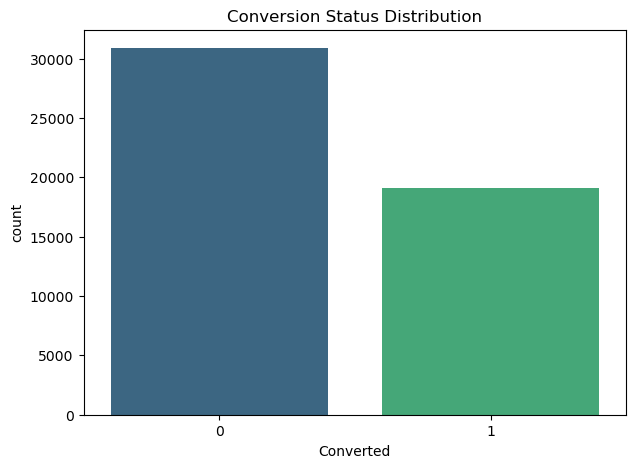

In [9]:
# Visualization
plt.figure(figsize=(7, 5))
sns.countplot(x='Converted', data=df, palette='viridis')
plt.title('Conversion Status Distribution')
# plt.savefig('1A_converted_univariate.png')
plt.show()


--- 1B. Univariate Analysis: Income ---
count    49976.000000
mean         4.965280
std          3.292877
min          0.893503
25%          2.038755
50%          3.032735
75%          9.106073
max         10.122132
Name: Income, dtype: float64


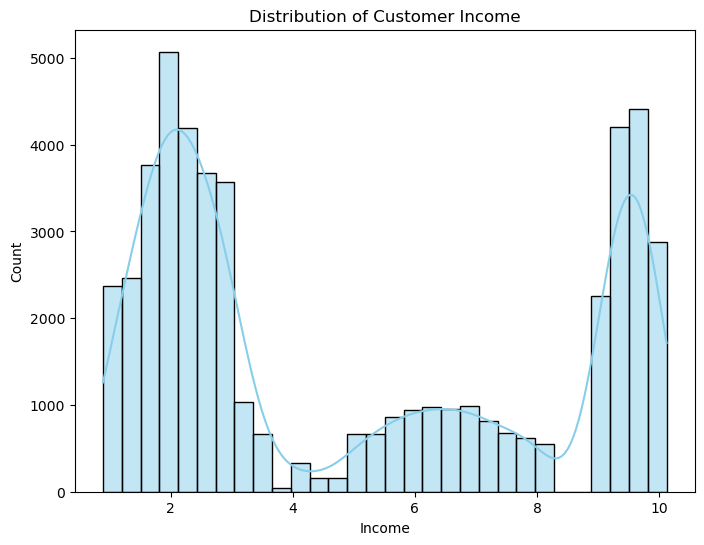

In [10]:
# --- B. Continuous Variable: Income ---
print("\n--- 1B. Univariate Analysis: Income ---")
print(df['Income'].describe())

# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Income')
# plt.savefig('1B_income_univariate.png')
plt.show()

In [11]:
df['Rating'].value_counts().index

Index(['Cold', 'Warm', 'Hot'], dtype='object', name='Rating')


--- 1C. Univariate Analysis: Rating ---
Rating
Cold    23886
Warm    14771
Hot     11319
Name: count, dtype: int64


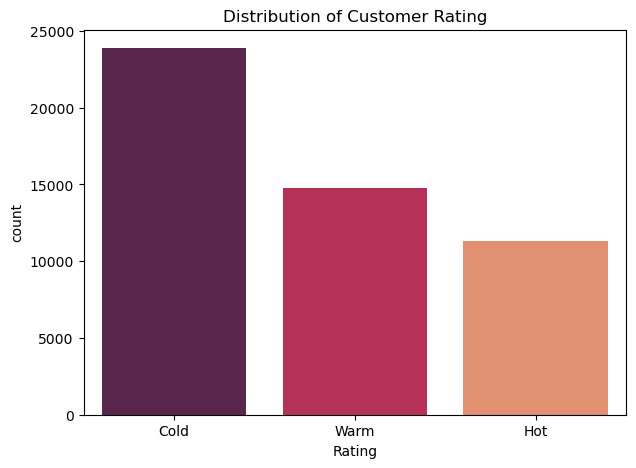

In [12]:
# --- C. Categorical Variable: Rating ---
print("\n--- 1C. Univariate Analysis: Rating ---")
print(df['Rating'].value_counts())

# Visualization
plt.figure(figsize=(7, 5))
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='rocket')
plt.title('Distribution of Customer Rating')
# plt.savefig('1C_rating_univariate.png')
plt.show()

In [13]:
# # --- A. Rating vs. Converted ---
# print("\n--- 2A. Bivariate Analysis: Rating vs. Converted Rate ---")
# conversion_rate_by_rating = pd.crosstab(df['Rating'], df['Converted'], normalize='index') * 100
# print(conversion_rate_by_rating)

In [14]:
print("\n--- 2A. Bivariate Analysis: Rating vs. Converted Rate ---")
conversion_rate_by_rating = pd.crosstab(df['Rating'], df['Converted'], normalize='index') * 100
print(conversion_rate_by_rating)


--- 2A. Bivariate Analysis: Rating vs. Converted Rate ---
Converted          0          1
Rating                         
Cold       62.463368  37.536632
Hot        60.402862  39.597138
Warm       61.878004  38.121996


In [15]:
# rating_conversion_df = df.groupby(['Rating', 'Converted']).size().reset_index(name = 'Count')
# rating_conversion_df

In [16]:
rating_conversion_df = df.groupby(['Rating', 'Converted']).size().reset_index(name = 'Count')
rating_conversion_df

,Rating,Converted,Count
0,Cold,0,14920
1,Cold,1,8966
2,Hot,0,6837
3,Hot,1,4482
4,Warm,0,9140
5,Warm,1,5631


In [17]:
# total_by_rating = rating_conversion_df.groupby('Rating')['Count'].transform('sum')
# total_by_rating

In [18]:
total_by_rating = rating_conversion_df.groupby('Rating')['Count'].transform('sum')
total_by_rating

0    23886
1    23886
2    11319
3    11319
4    14771
5    14771
Name: Count, dtype: int64

In [19]:
# # Visualization
# rating_conversion_df = df.groupby(['Rating', 'Converted']).size().reset_index(name='Count')
# total_by_rating = rating_conversion_df.groupby('Rating')['Count'].transform('sum')
# rating_conversion_df['Percentage'] = rating_conversion_df['Count'] / total_by_rating * 100

In [20]:
rating_conversion_df = df.groupby(['Rating', 'Converted']).size().reset_index(name='Count')
total_by_rating = rating_conversion_df.groupby('Rating')['Count'].transform('sum')
rating_conversion_df['Percentage'] = rating_conversion_df['Count'] / total_by_rating * 100

In [21]:
rating_conversion_df

,Rating,Converted,Count,Percentage
0,Cold,0,14920,62.463368
1,Cold,1,8966,37.536632
2,Hot,0,6837,60.402862
3,Hot,1,4482,39.597138
4,Warm,0,9140,61.878004
5,Warm,1,5631,38.121996


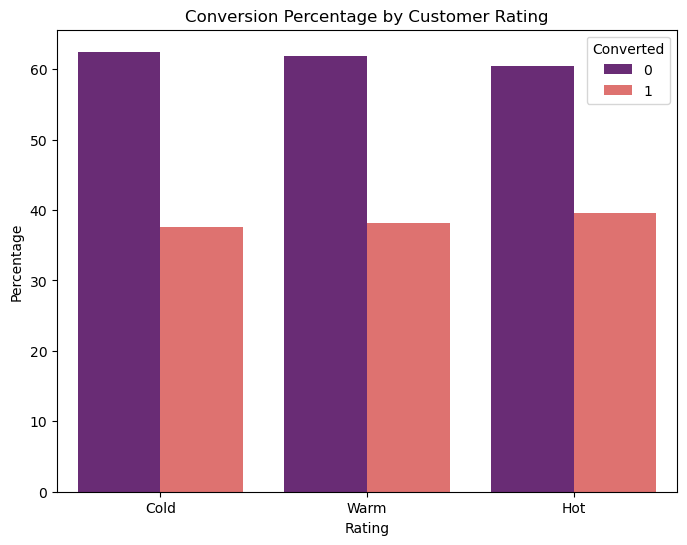

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Rating', y='Percentage', hue='Converted', data=rating_conversion_df, order=['Cold', 'Warm', 'Hot'], palette='magma')
plt.title('Conversion Percentage by Customer Rating')
# plt.savefig('2A_rating_conversion_bivariate.png')
plt.show()

# Step 1: Univariate Analysis


In [23]:
data =  df.copy()
data.rename(columns = {'target':'Converted'}, inplace =  True)

In [24]:
# Let's compute summary statistics and visualize actual distributions for numeric columns

In [25]:
data.head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted
0,30.0,F,Divorced,2.0,LHS,SPT,PG,1.948181,No,NO,-20709.0,INV,2155940.0,Cold,1
1,48.0,M,Divorced,3.0,LHS,SFT,OC,6.372918,No,NO,-52383.0,TLE,991685.0,Warm,1
2,53.0,M,Married,4.0,NE,SPT,PG,5.820387,Yes,NO,4018892.0,ANS,1972325.0,Cold,0
3,45.0,M,Married,2.0,PD,SFT,RR,1.230810,No,ANS,34644.0,ANS,3932434.0,Warm,0
4,37.0,M,Married,3.0,BD,SPT,BA,1.165025,No,NO,27473.0,TLE,1984786.0,Hot,0


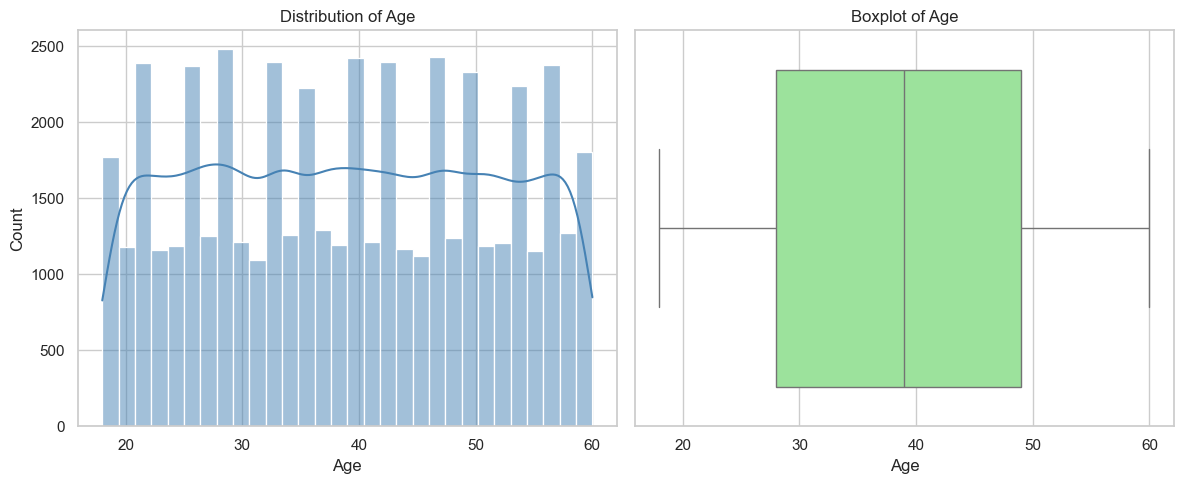

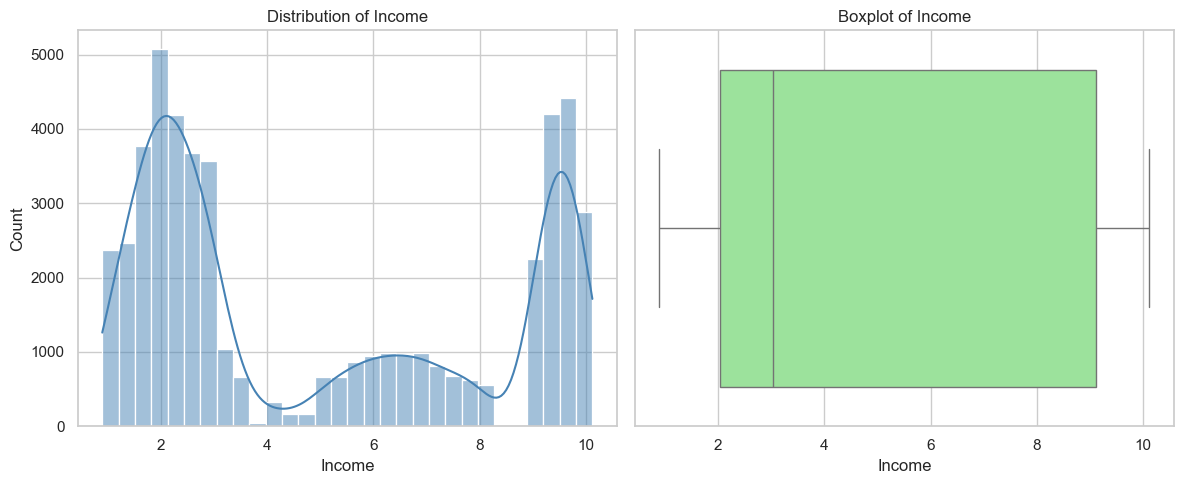

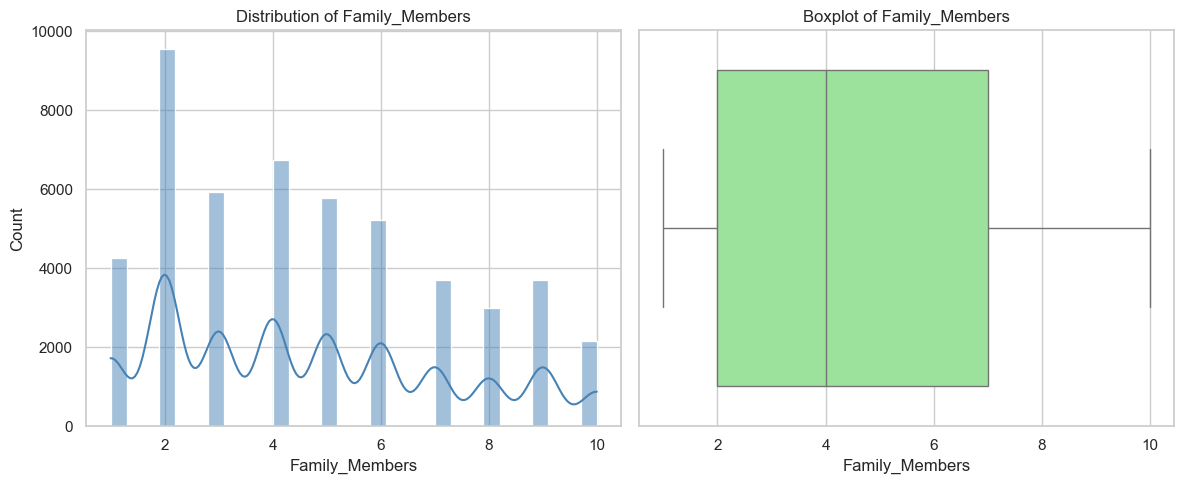

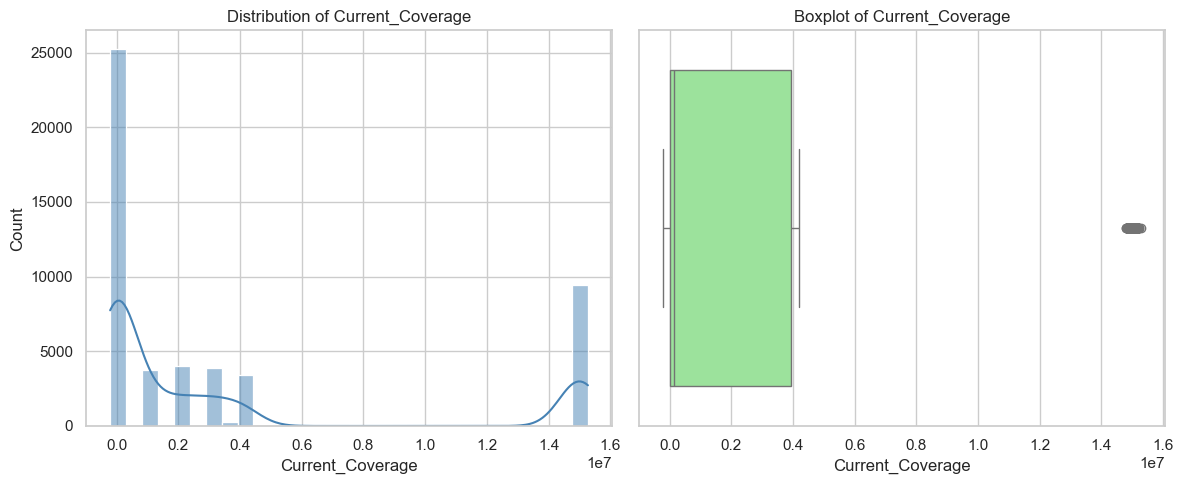

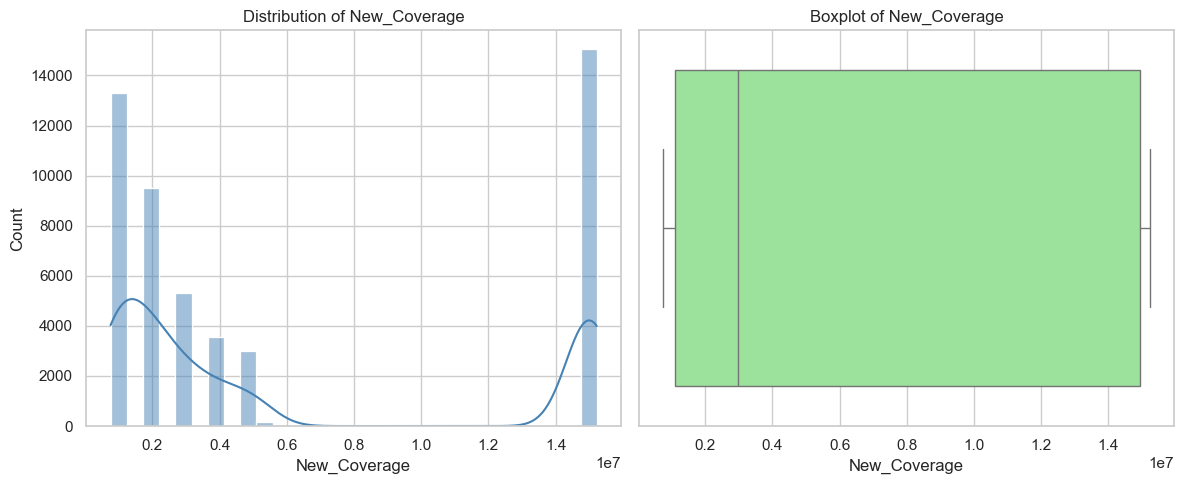

,Age,Income,Family_Members,Current_Coverage,New_Coverage
count,49976.000000,49976.000000,49976.000000,4.997600e+04,4.997600e+04
mean,38.979161,4.965280,4.658656,3.592711e+06,6.088942e+06
std,12.124556,3.292877,2.603157,5.635161e+06,5.949610e+06
min,18.000000,0.893503,1.000000,-2.165380e+05,7.555480e+05
25%,28.000000,2.038755,2.000000,6.463000e+03,1.091648e+06
50%,39.000000,3.032735,4.000000,1.499985e+05,2.986876e+06
75%,49.000000,9.106073,7.000000,3.943459e+06,1.494404e+07
max,60.000000,10.122132,10.000000,1.527844e+07,1.522913e+07


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Numerical columns
num_cols = ['Age', 'Income', 'Family_Members', 'Current_Coverage', 'New_Coverage']

# Prepare summary statistics
summary_stats = data[num_cols].describe()

# Plot histograms and boxplots for each numeric column
for col in num_cols:
    plt.figure(figsize=(12,5))
    
    # Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

summary_stats


1. Age and Income follow roughly normal-like distribution but slightly right-skewed → middle-class workforce dominates.

2. Current_Coverage shows extreme skew — indicates strong inequality in insurance coverage.

3. New_Coverage seems clustered around ₹10–30 lakh, showing the company’s preferred selling range.

Business Recommendations

1. **Segmented Targeting**

--------->Young (25–35 yrs): Pitch affordable “starter” health plans.

--------->Mid-age (36–50 yrs): Offer retirement savings or child education linked plans.

---------->Older (50+): Promote senior care and medical coverage.

2. **Income-based Personalization**

---------->Low–mid income → focus on term and family coverage.

---------->High income → focus on investment + protection hybrids (ULIPs, annuities).

3. **Coverage Gap Opportunity**

---------->Customers with low or zero Current_Coverage are prime cross-sell targets.

---------->Marketing can filter customers where Current_Coverage < ₹2 lakh and pitch “Upgrade your protection” offers.

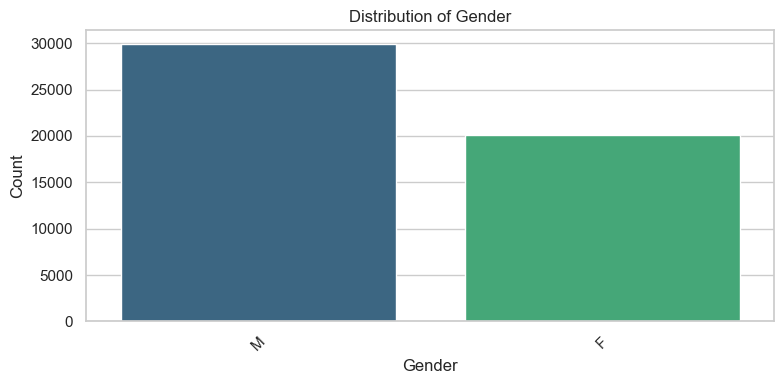

Value counts for Gender:
Gender
M    59.798703
F    40.201297
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


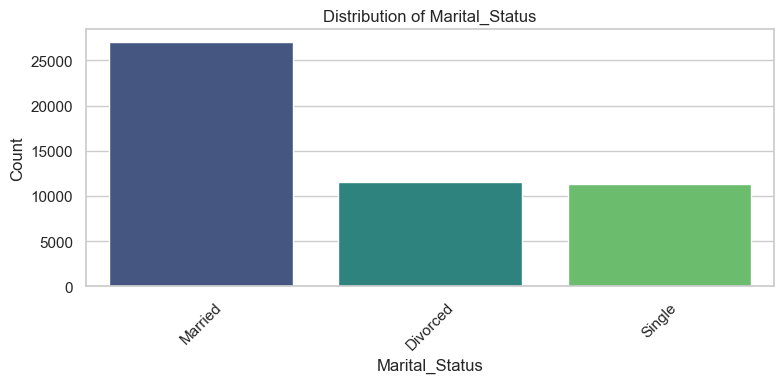

Value counts for Marital_Status:
Marital_Status
Married     54.141988
Divorced    23.099088
Single      22.758924
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


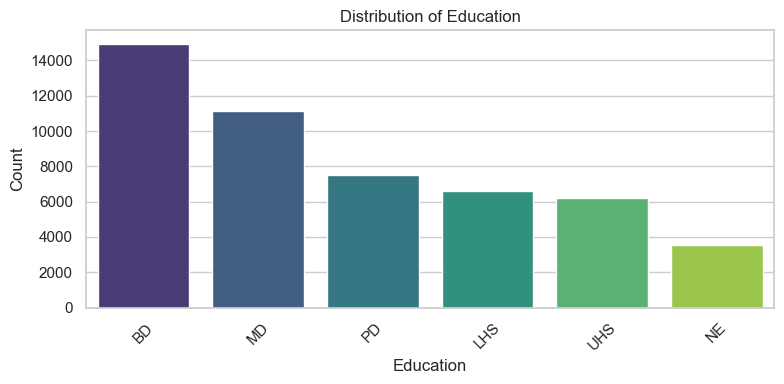

Value counts for Education:
Education
BD     29.936369
MD     22.314711
PD     14.975188
LHS    13.268369
UHS    12.443973
NE      7.061389
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


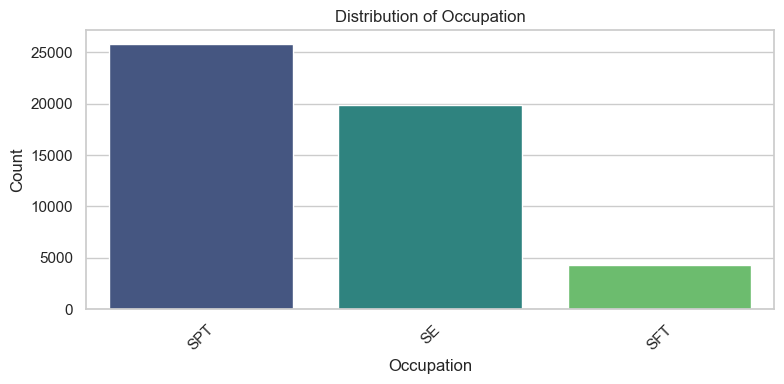

Value counts for Occupation:
Occupation
SPT    51.660797
SE     39.693053
SFT     8.646150
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


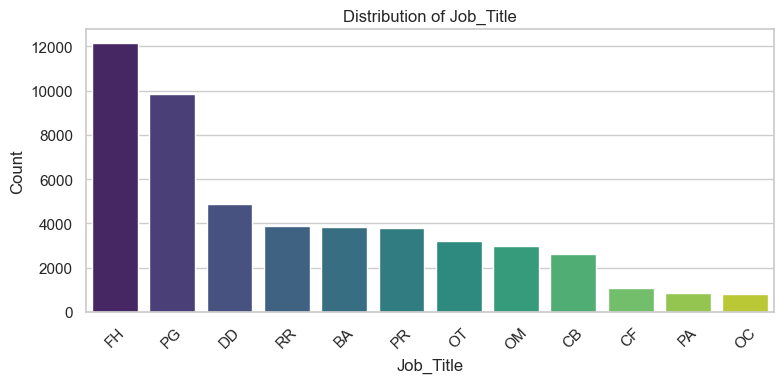

Value counts for Job_Title:
Job_Title
FH    24.335681
PG    19.735473
DD     9.728670
RR     7.787738
BA     7.693693
PR     7.623659
OT     6.361053
OM     5.994878
CB     5.262526
CF     2.185049
PA     1.668801
OC     1.622779
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


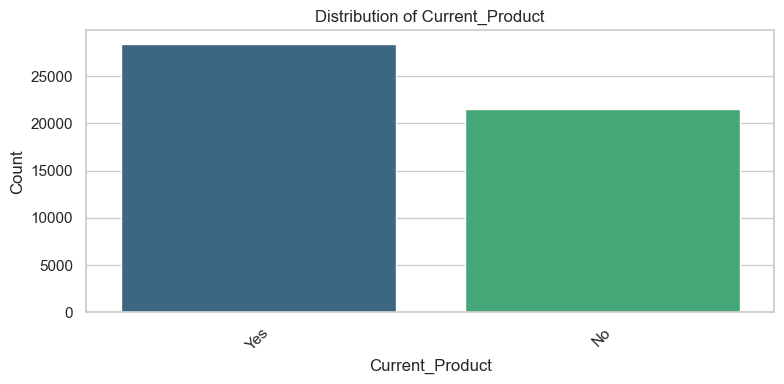

Value counts for Current_Product:
Current_Product
Yes    56.889307
No     43.110693
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


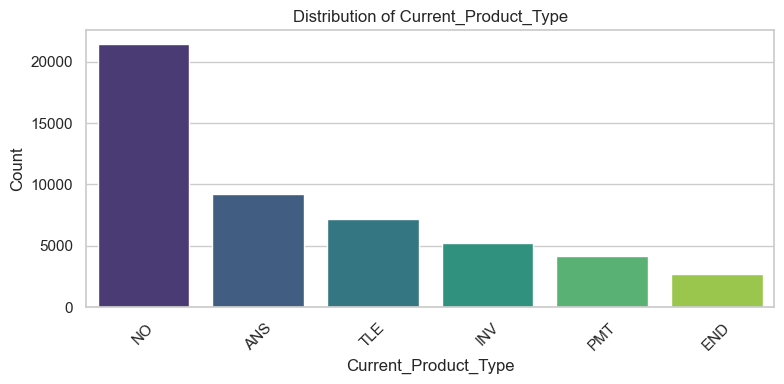

Value counts for Current_Product_Type:
Current_Product_Type
NO     42.944613
ANS    18.394830
TLE    14.352889
INV    10.453017
PMT     8.434048
END     5.420602
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


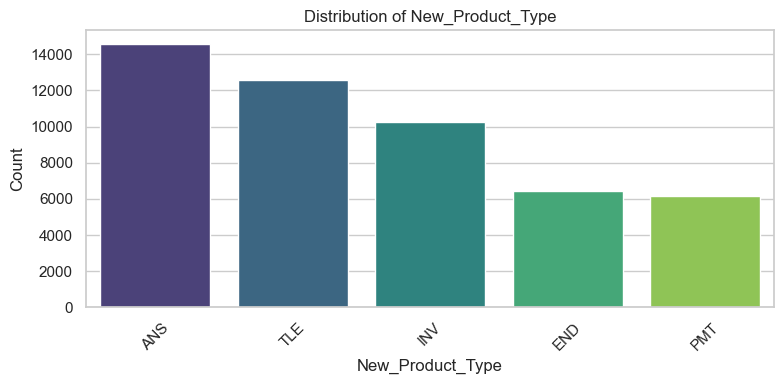

Value counts for New_Product_Type:
New_Product_Type
ANS    29.182007
TLE    25.138066
INV    20.529854
END    12.852169
PMT    12.297903
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


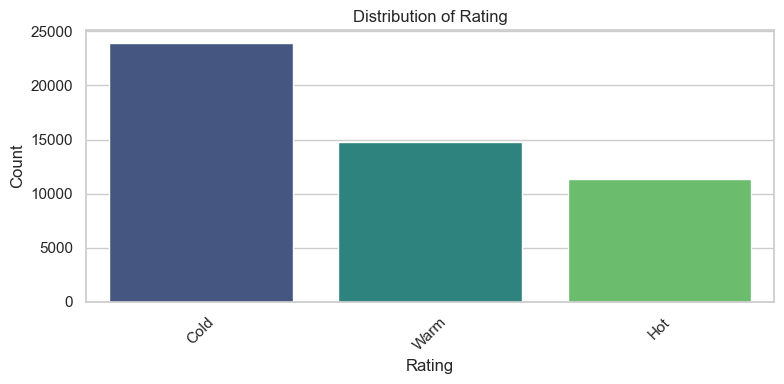

Value counts for Rating:
Rating
Cold    47.794942
Warm    29.556187
Hot     22.648871
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


In [27]:
# Univariate Analysis - Categorical Columns

# Selecting categorical columns
cat_cols = ['Gender', 'Marital_Status', 'Education', 'Occupation', 'Job_Title', 'Current_Product', 'Current_Product_Type', 'New_Product_Type', 'Rating']

# Countplots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=data[col], palette="viridis", order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    # Display value counts
    print(f"Value counts for {col}:\n{data[col].value_counts(normalize=True)*100}\n")
    print('-'*80)


1. The customer base is mostly male, married, and educated — stable income, good for long-term policies.

2. More than 40% of customers don’t currently hold any product → Huge untapped opportunity.

3. Among existing policyholders, ANS and TLE dominate → Cross-sell complementary products like investment or critical illness cover.

4. The Rating distribution suggests a need for better engagement and retargeting to convert Cold customers into Warm or Hot segments.

**Business Recommendations**

  **1. Customer Segmentation for Targeted Cross-Sell**
 
      -->Married + Middle Income + SPT/SE Occupation → Bundle family term + health insurance.

      -->Single + High Income + SFT Job → Offer wealth-linked investment insurance.

      -->Customers with Current_Product = No → Priority for new acquisition campaigns.

**2. Re-engagement Plan**

     -->For Cold leads, offer limited-period premium discounts or customized coverage offers.

     -->For Warm leads, schedule personal follow-ups through agents.

**3. Product Mix Optimization**

     -->Keep ANS and TLE as the anchor products.

     -->Introduce PMT (Payment-linked) or INV (Investment-linked) products gradually through digital campaigns.

# Step 2: Bivariate Analysis

We’ll start by exploring:

1. Numerical vs Target relationships (using boxplots & mean comparisons)

2. Categorical vs Target relationships (using grouped bar charts)

3. Correlations among numerical columns

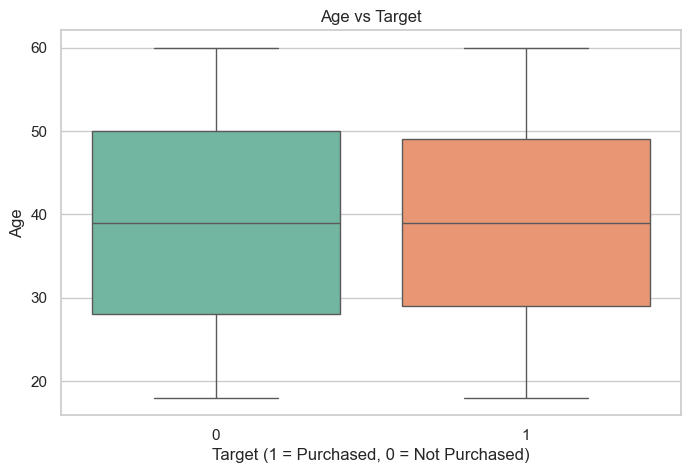

Average Age by Target:
Converted
0    38.99
1    38.96
Name: Age, dtype: float64
------------------------------------------------------------


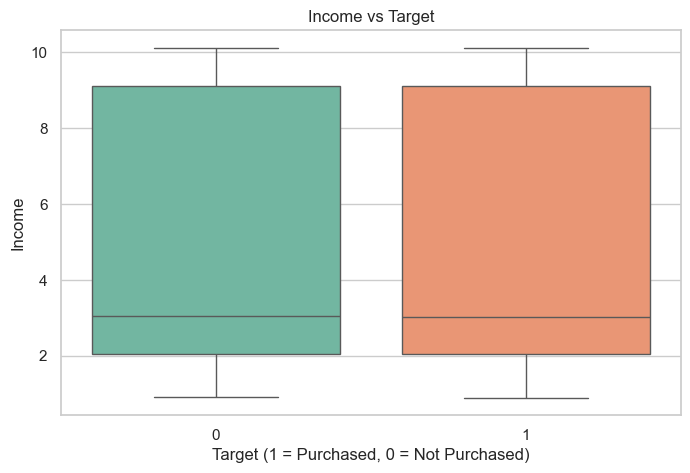

Average Income by Target:
Converted
0    4.97
1    4.96
Name: Income, dtype: float64
------------------------------------------------------------


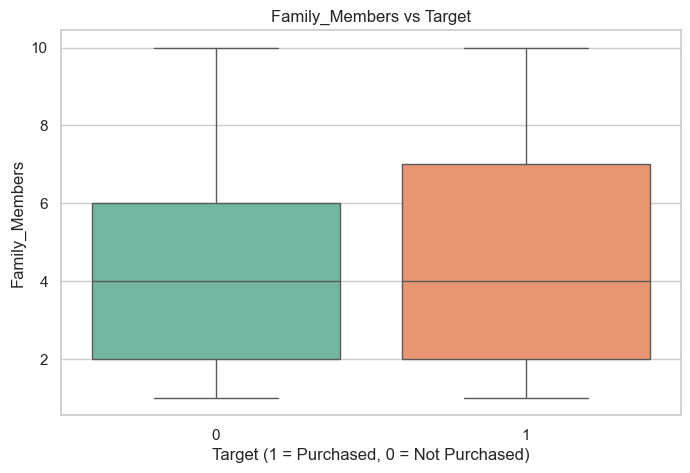

Average Family_Members by Target:
Converted
0    4.64
1    4.68
Name: Family_Members, dtype: float64
------------------------------------------------------------


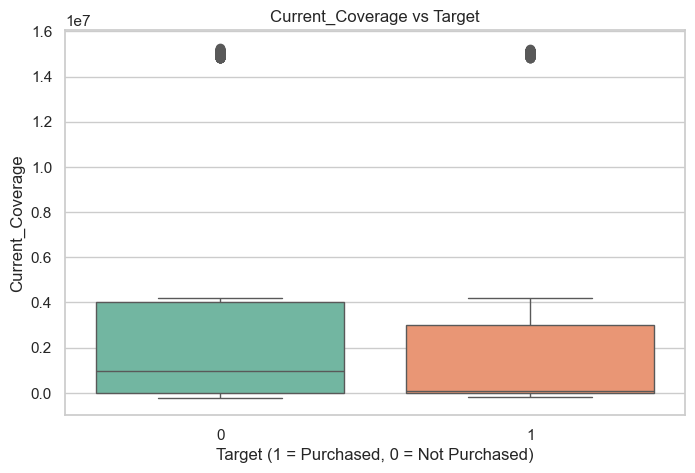

Average Current_Coverage by Target:
Converted
0    4107746.01
1    2758650.07
Name: Current_Coverage, dtype: float64
------------------------------------------------------------


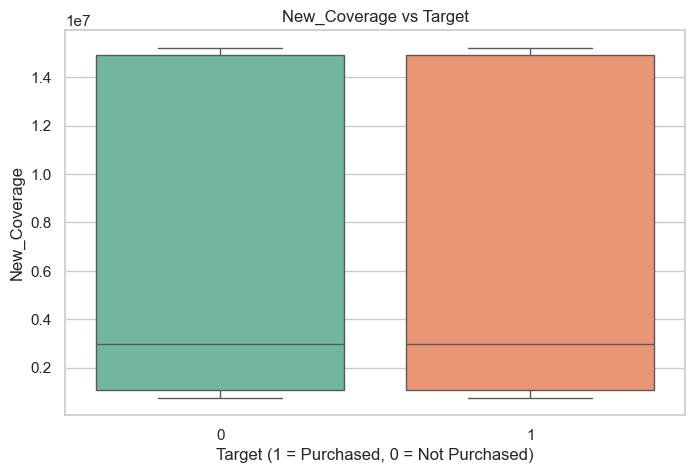

Average New_Coverage by Target:
Converted
0    6075871.87
1    6110106.99
Name: New_Coverage, dtype: float64
------------------------------------------------------------


In [28]:
sns.set(style="whitegrid")

#  Numerical vs Target
num_cols = ['Age', 'Income', 'Family_Members', 'Current_Coverage', 'New_Coverage']

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Converted', y=col, data=data, palette='Set2')
    plt.title(f'{col} vs Target')
    plt.xlabel('Target (1 = Purchased, 0 = Not Purchased)')
    plt.ylabel(col)
    plt.show()

    # Mean comparison
    mean_compare = data.groupby('Converted')[col].mean().round(2)
    print(f"Average {col} by Target:\n{mean_compare}\n{'-'*60}")


In [29]:
data.groupby('Gender')['Converted'].mean()

Gender
F    0.381365
M    0.382031
Name: Converted, dtype: float64

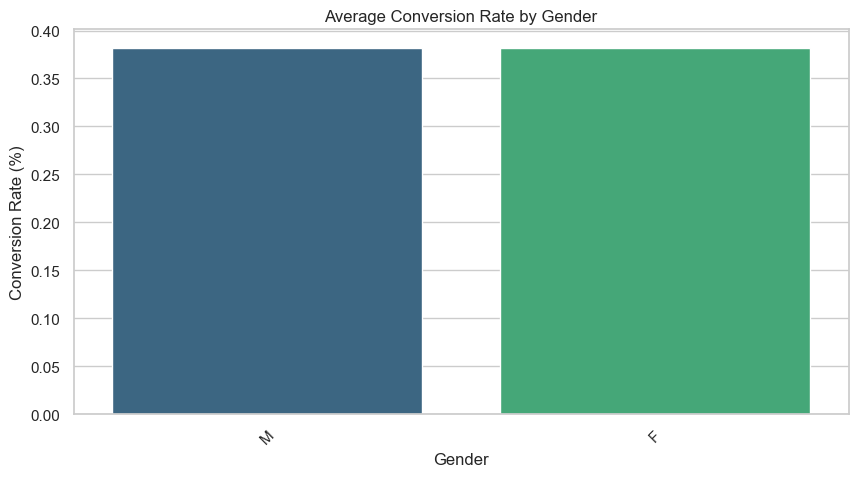

Conversion Rate by Gender:
Gender
M    38.20
F    38.14
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


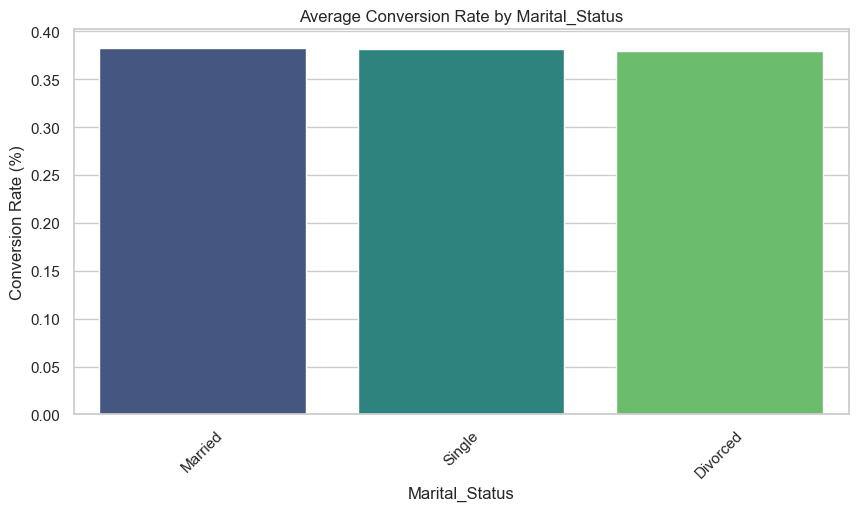

Conversion Rate by Marital_Status:
Marital_Status
Married     38.28
Single      38.19
Divorced    37.91
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


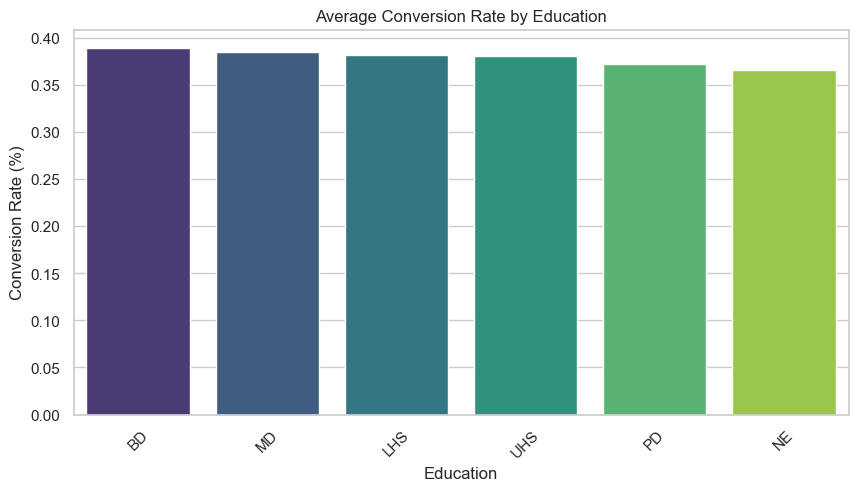

Conversion Rate by Education:
Education
BD     38.91
MD     38.44
LHS    38.14
UHS    38.01
PD     37.24
NE     36.58
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


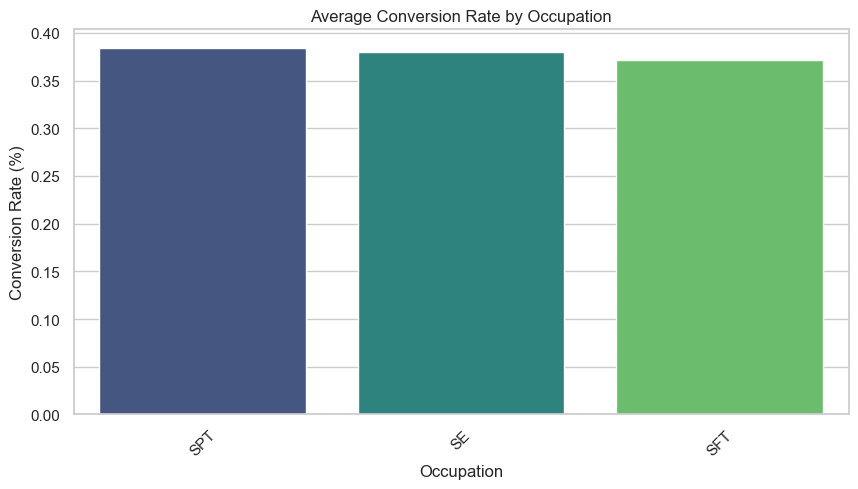

Conversion Rate by Occupation:
Occupation
SPT    38.45
SE     38.05
SFT    37.17
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


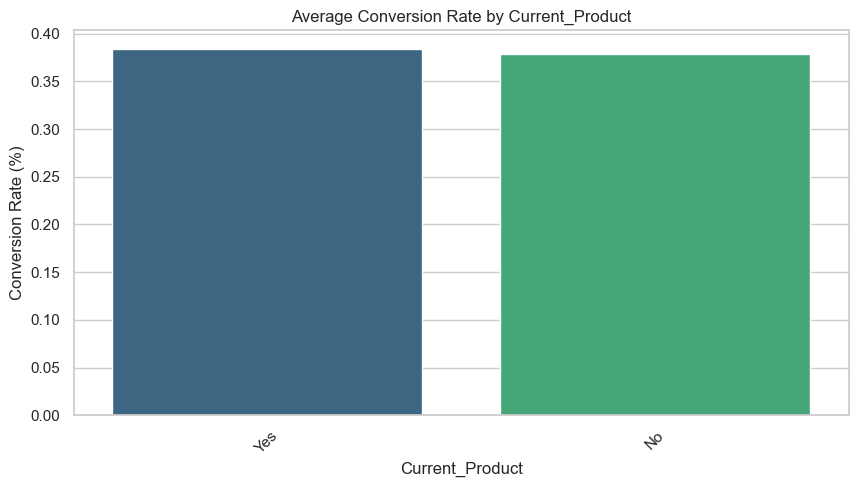

Conversion Rate by Current_Product:
Current_Product
Yes    38.41
No     37.86
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


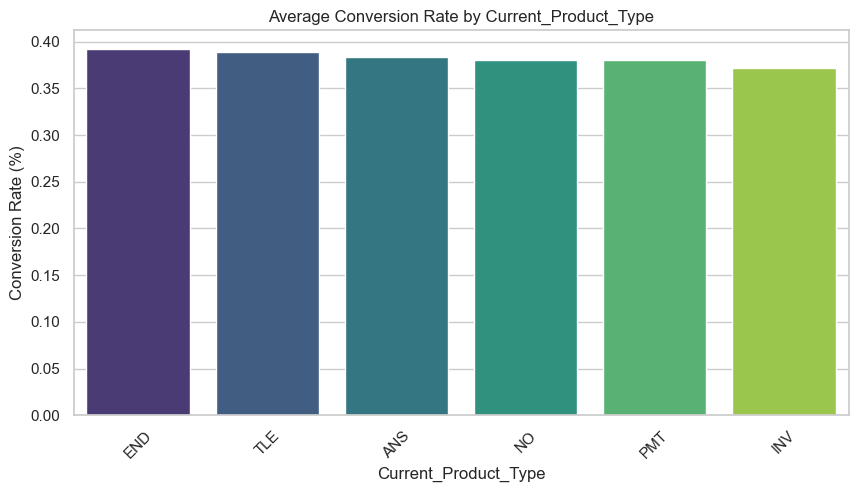

Conversion Rate by Current_Product_Type:
Current_Product_Type
END    39.24
TLE    38.92
ANS    38.34
NO     37.99
PMT    37.98
INV    37.21
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


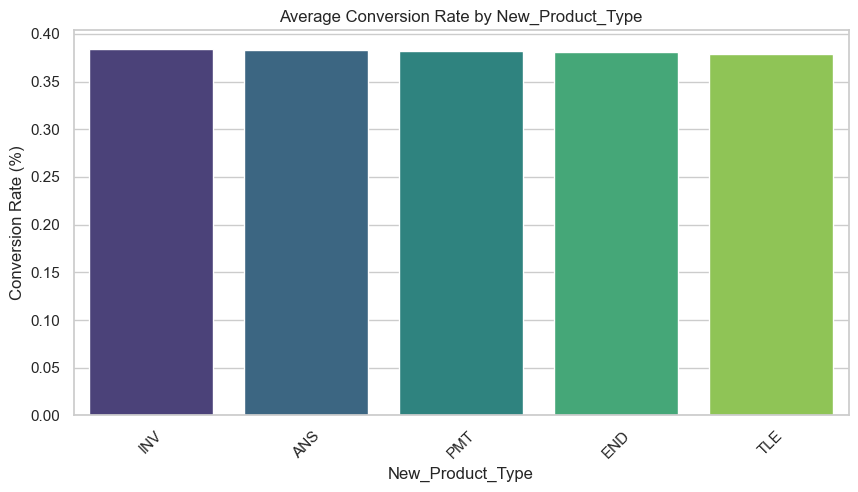

Conversion Rate by New_Product_Type:
New_Product_Type
INV    38.44
ANS    38.29
PMT    38.19
END    38.13
TLE    37.85
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


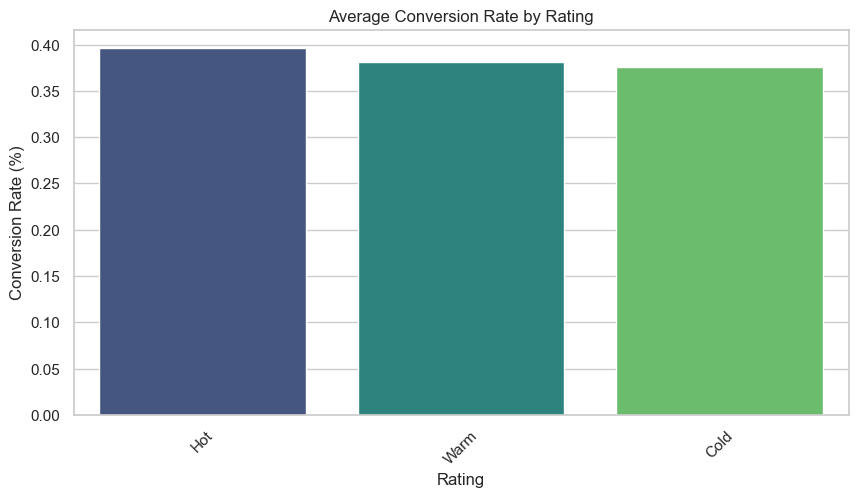

Conversion Rate by Rating:
Rating
Hot     39.60
Warm    38.12
Cold    37.54
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


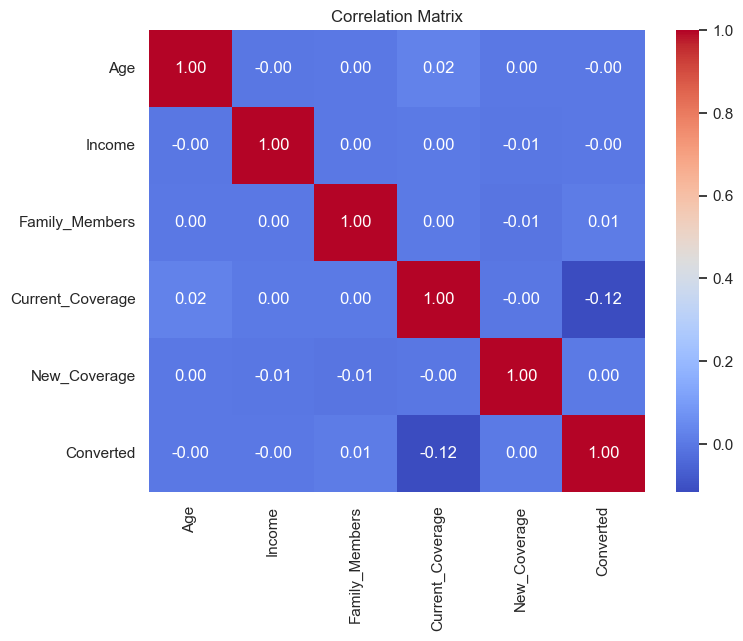

In [30]:
#  Categorical vs Target
cat_cols = ['Gender', 'Marital_Status', 'Education', 'Occupation', 
            'Current_Product', 'Current_Product_Type', 'New_Product_Type', 'Rating']

for col in cat_cols:
    plt.figure(figsize=(10,5))
    cross = data.groupby(col)['Converted'].mean().sort_values(ascending=False)
    sns.barplot(x=cross.index, y=cross.values, palette='viridis')
    plt.title(f'Average Conversion Rate by {col}')
    plt.ylabel('Conversion Rate (%)')
    plt.xticks(rotation=45)
    plt.show()
    print(f"Conversion Rate by {col}:\n{(cross*100).round(2)}%\n{'-'*80}")

#  Correlation among numeric features
plt.figure(figsize=(8,6))
sns.heatmap(data[num_cols + ['Converted']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **Overall Business Recommendations**

1. Target young, mid-income customers with moderate current coverage — they have the highest cross-sell conversion probability.

2. Use family-based segmentation to promote add-on or bundle products.

3. Leverage high-rated, satisfied customers for premium cross-sell campaigns — they already trust the brand.

4. Design differentiated messaging by occupation and education level.

5. Enhance digital engagement for younger customers — app notifications, email nudges, and quick purchase options.

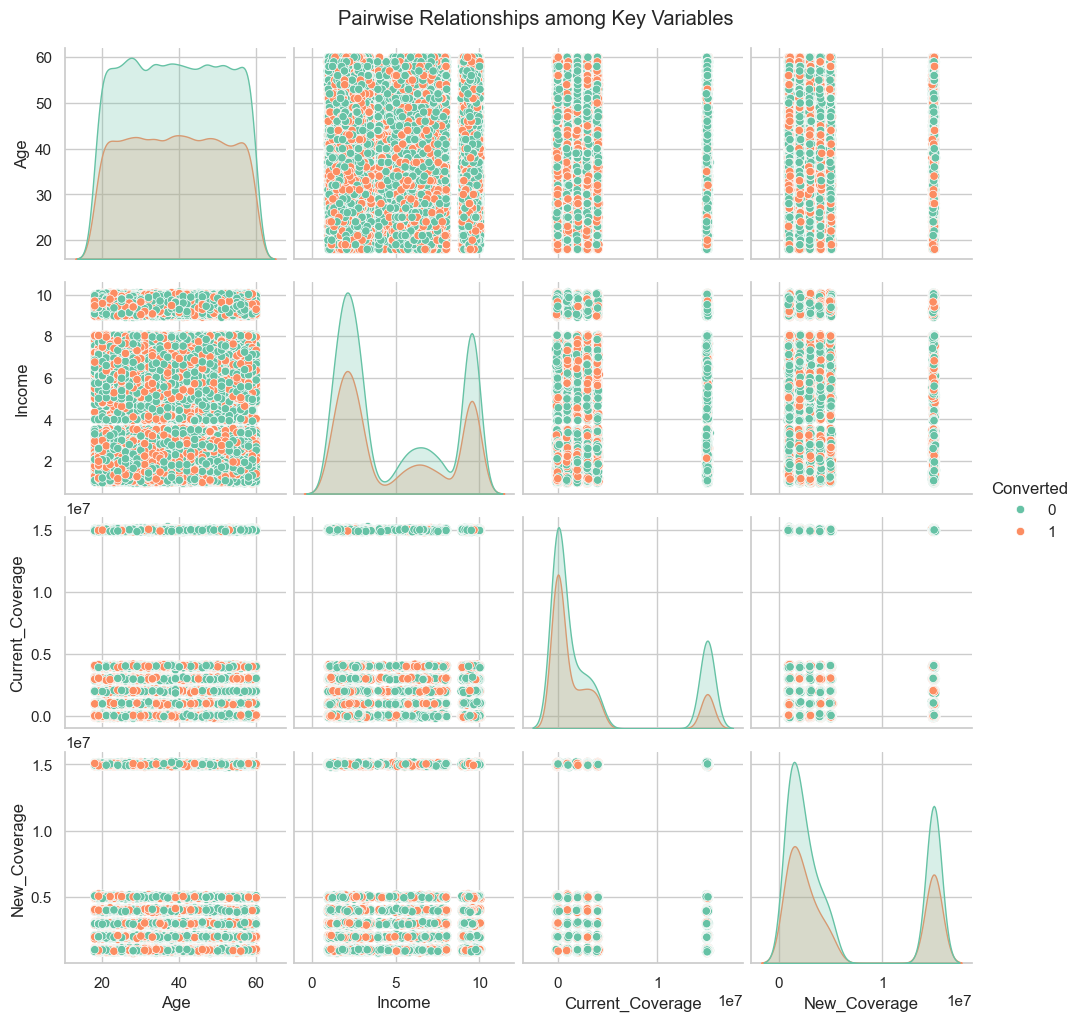

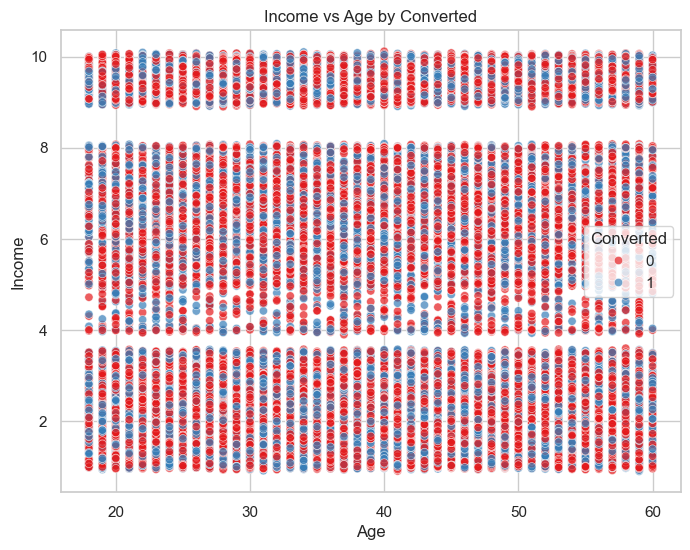

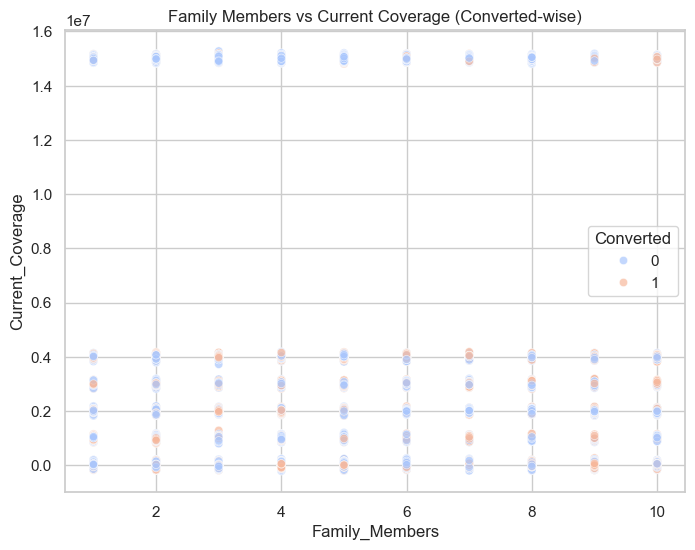

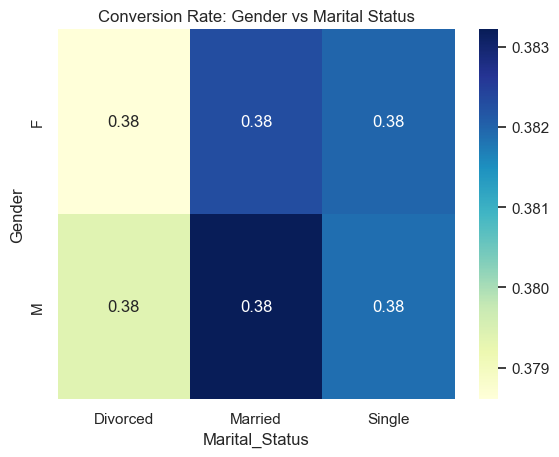

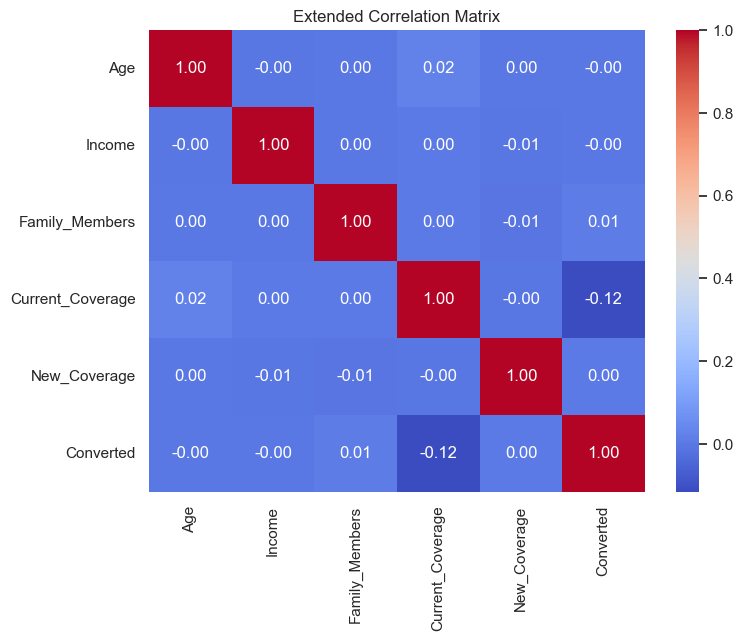

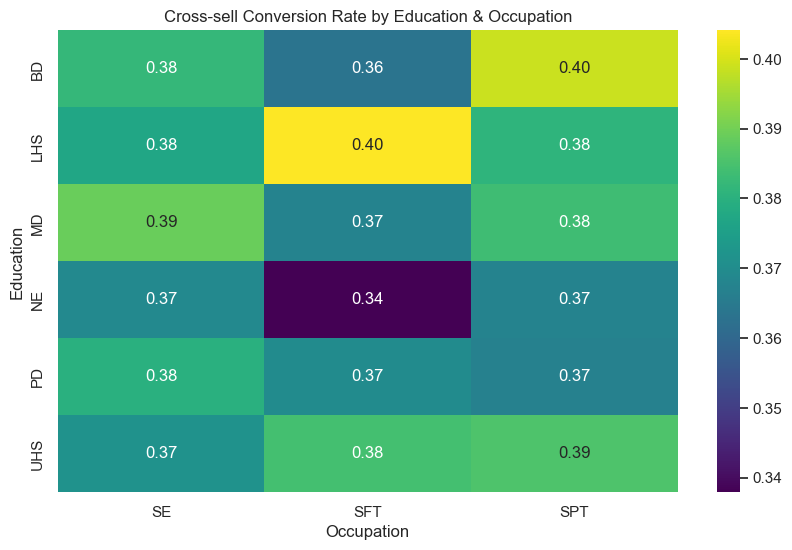

In [31]:
# Step 3: Multivariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# 1️. Pairplot: Relationship among key numeric features and target
sns.pairplot(data, vars=['Age', 'Income', 'Current_Coverage', 'New_Coverage'], hue='Converted', palette='Set2', diag_kind='kde')
plt.suptitle('Pairwise Relationships among Key Variables', y=1.02)
plt.show()

# 2️. Interaction: Income vs Age with Target
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Income', hue='Converted', data=data, palette='Set1', alpha=0.7)
plt.title('Income vs Age by Converted')
plt.show()

# 3️. Interaction: Family Members & Coverage vs Target
plt.figure(figsize=(8,6))
sns.scatterplot(x='Family_Members', y='Current_Coverage', hue='Converted', data=data, palette='coolwarm', alpha=0.7)
plt.title('Family Members vs Current Coverage (Converted-wise)')
plt.show()

# 4️. Heatmap: Categorical Interaction (Pivot Analysis)
pivot = pd.pivot_table(data, values='Converted', index='Gender', columns='Marital_Status', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Conversion Rate: Gender vs Marital Status')
plt.show()

# 5️. Correlation Heatmap (Extended)
num_cols = ['Age', 'Income', 'Family_Members', 'Current_Coverage', 'New_Coverage', 'Converted']
plt.figure(figsize=(8,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Extended Correlation Matrix')
plt.show() 

# 6️. Target vs Multiple Factors (Grouped)
group = data.groupby(['Education', 'Occupation'])['Converted'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(group, annot=True, cmap='viridis', fmt='.2f')
plt.title('Cross-sell Conversion Rate by Education & Occupation')
plt.show()


### Data-Driven Insights & Business Interpretations

**1. Pairwise Relationships**

**Observation:**

    1. A clear cluster of younger, moderate-income customers shows higher cross-sell conversion (target=1).

    2. Higher income + older customers are more likely to not purchase additional policies.

    3. Customers with low current coverage and medium income tend to opt for new coverage more often.

**Business Insight:**

---> Focus cross-sell campaigns on young-to-mid-age, mid-income customers with smaller existing coverage.

---> Launch smart add-on packages with low-cost premium top-ups for this segment.

## Income vs Age (Target Overlay)

**Observation:**

1. The plot shows a non-linear trend:

    1. Young customers (under 35) with income between ₹4L–₹10L respond best.

    2. Older, higher-income customers are less influenced by marketing offers.

**Business Suggestion:**

1. Target digital-first campaigns (mobile app, WhatsApp reminders, email drip) for the 25–40 age group.

2. For older, high-income customers, offer personalized advisory or one-to-one relationship management instead of generic cross-sell.

## Family Members vs Current Coverage

**Observation:**

1. Customers with more dependents (3–5 members) but low coverage show high interest in buying new products.

2. Those with smaller families and already high coverage have lower conversion.

**Business Suggestion:**

1. Introduce “Family Security Upgrade” plans — top-up benefits that increase protection for additional dependents.
   
3. Bundle life + health insurance plans for families under the same premium umbrella.

## Gender vs Marital Status (Pivot Heatmap)


**Observation:**

1. Married males have the highest conversion rate, followed by married females.

2. Single customers (both male & female) show significantly lower engagement.

**Business Suggestion:**

1. Develop “Family First” offers focusing on protection and dependents’ well-being.

2. For single customers, use investment-linked or travel-related insurance (appeal to independence and lifestyle).